# Bonus Exercise

#### Pure Python

In [17]:
import numpy as np
import time

def mandelbrot_python(width, height, x_min, x_max, y_min, y_max, max_iter=100):
    x_vals = np.linspace(x_min, x_max, width)
    y_vals = np.linspace(y_min, y_max, height)
    image = np.zeros((height, width), dtype=int)

    for i in range(height):
        for j in range(width):
            c = complex(x_vals[j], y_vals[i])
            z = 0 + 0j
            for n in range(max_iter):
                if abs(z) > 2:
                    image[i, j] = n
                    break
                z = z * z + c
            else:
                image[i, j] = max_iter
    return image

#### numpy

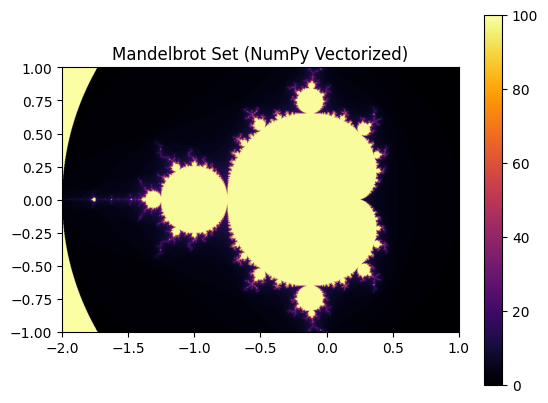

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot_numpy(width, height, x_min, x_max, y_min, y_max, max_iter=100):
    x_vals = np.linspace(x_min, x_max, width)
    y_vals = np.linspace(y_min, y_max, height)
    X, Y = np.meshgrid(x_vals, y_vals)  
    C = X + 1j * Y  

    Z = np.zeros_like(C, dtype=np.complex128)
    M = np.full(C.shape, max_iter, dtype=np.int32)
    mask = np.ones(C.shape, dtype=bool)

    for i in range(max_iter):
        Z[mask] = Z[mask] ** 2 + C[mask]
        mask = (np.abs(Z) <= 2)  
        M[mask] = i

    return M

width, height = 1000, 800
x_min, x_max, y_min, y_max = -2, 1, -1, 1
image = mandelbrot_numpy(width, height, x_min, x_max, y_min, y_max)

plt.imshow(image, cmap='inferno', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.title("Mandelbrot Set (NumPy Vectorized)")
plt.show()

#### Cupy

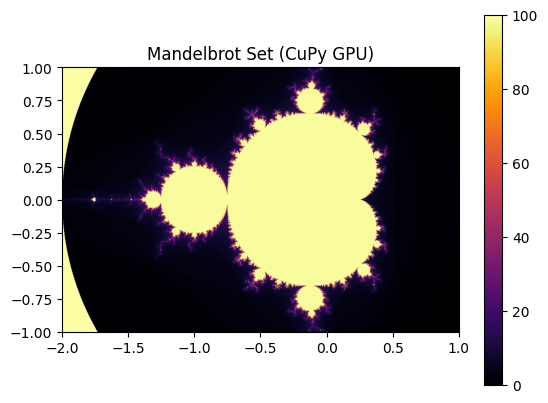

In [19]:
import cupy as cp
import matplotlib.pyplot as plt

def mandelbrot_gpu(width, height, x_min, x_max, y_min, y_max, max_iter=100):
    x_vals = cp.linspace(x_min, x_max, width)
    y_vals = cp.linspace(y_min, y_max, height)
    X, Y = cp.meshgrid(x_vals, y_vals)
    C = X + 1j * Y

    Z = cp.zeros_like(C, dtype=cp.complex128)
    M = cp.full(C.shape, max_iter, dtype=cp.int32)
    mask = cp.ones(C.shape, dtype=bool)

    for i in range(max_iter):
        Z[mask] = Z[mask] ** 2 + C[mask]
        mask = (cp.abs(Z) <= 2)
        M[mask] = i

    return cp.asnumpy(M)

width, height = 1000, 800
image = mandelbrot_gpu(width, height, -2, 1, -1, 1)

plt.imshow(image, cmap='inferno', extent=[-2, 1, -1, 1])
plt.colorbar()
plt.title("Mandelbrot Set (CuPy GPU)")
plt.show()


#### Comparison

In [20]:
import sys
sys.path.append(r"build/lib.win-amd64-cpython-312")

Python execution time: 0.8559 seconds
Cython execution time: 0.0316 seconds
NumPy execution time: 0.2410 seconds
CuPy (GPU) execution time: 0.0666 seconds


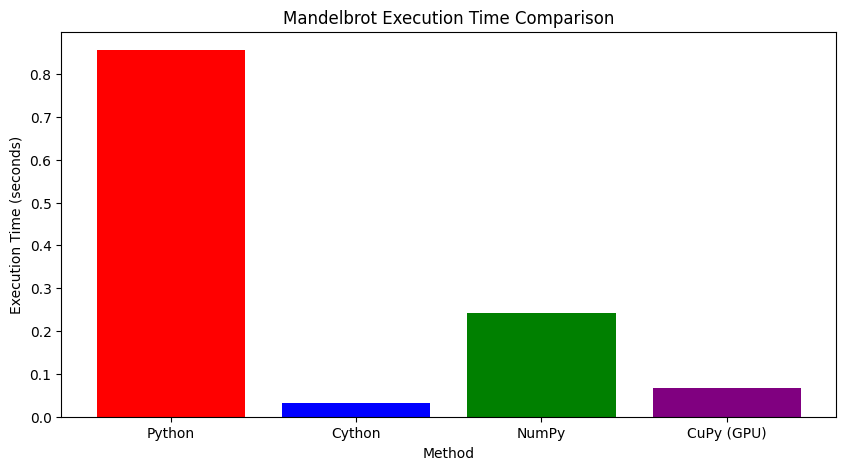

In [21]:
import time
import matplotlib.pyplot as plt
import mandelbrot_cython

width, height = 500, 500
x_min, x_max, y_min, y_max = -2, 1, -1, 1
max_iter = 100

def time_execution(func, *args):
    start = time.time()
    func(*args)
    return time.time() - start

times = {
    "Python": time_execution(mandelbrot_python, width, height, x_min, x_max, y_min, y_max, max_iter),
    "Cython": time_execution(mandelbrot_cython.mandelbrot_set_cython, width, height, x_min, x_max, y_min, y_max, max_iter),
    "NumPy": time_execution(mandelbrot_numpy, width, height, x_min, x_max, y_min, y_max, max_iter),
    "CuPy (GPU)": time_execution(mandelbrot_gpu, width, height, x_min, x_max, y_min, y_max, max_iter),
}

for method, t in times.items():
    print(f"{method} execution time: {t:.4f} seconds")


plt.figure(figsize=(10, 5))
plt.bar(times.keys(), times.values(), color=['red', 'blue', 'green', 'purple'])
plt.xlabel("Method")
plt.ylabel("Execution Time (seconds)")
plt.title("Mandelbrot Execution Time Comparison")
plt.show()

When comparing the performance of NumPy and CuPy, a significant factor affecting execution time is data transfer between CPU and GPU. NumPy operations are executed on the CPU, while CuPy operations run on the GPU.
If data is frequently transferred between the two, it can significantly slow down execution.
   